In [1]:
# 导入自定义模块
from demo import GanApp

In [2]:
import numpy as np

In [3]:
np.__version__

'1.21.5'

In [4]:
# 实例化
gan = GanApp()

C:\conda\envs\project_gan\lib\site-packages\fastai\data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
C:\conda\envs\project_gan\lib\site-packages\fastai\data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


初始化deoldify ok
初始化RealSR ok


C:\Users\Administrator\Documents\douyin_live\DY21\demo.py:122: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


初始化FOM ok


In [7]:
# 导入相关包
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150

## 风格化

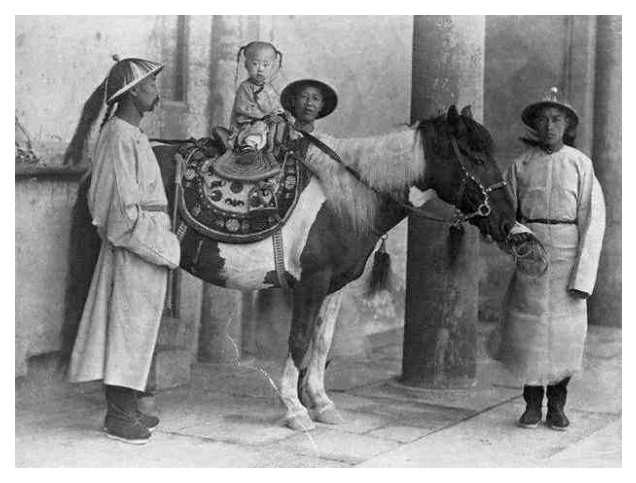

In [8]:
# 读取一张图
test_img = cv2.imread('./images/3.jpg')
# 转换颜色风格
test_img_cvt = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.axis('off')
# 显示原图
plt.imshow(test_img_cvt)

deoldify 转换成功


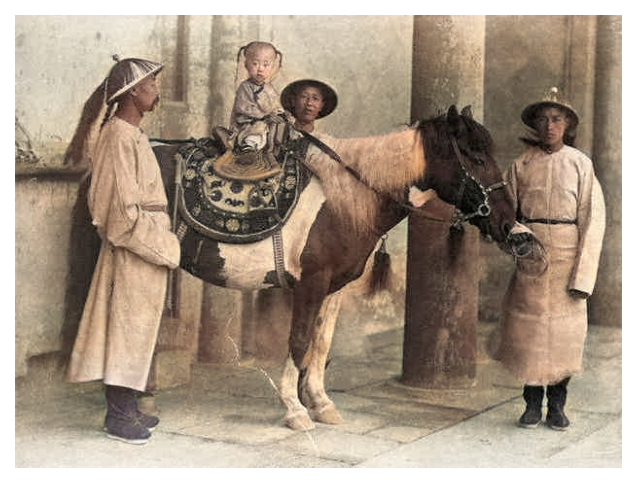

In [9]:
# 风格化
deold_img = gan.deoldify(test_img)   
# 转换颜色
deold_img_cvt = cv2.cvtColor(deold_img,cv2.COLOR_BGR2RGB)
plt.axis('off')
# 显示
plt.imshow(deold_img_cvt)

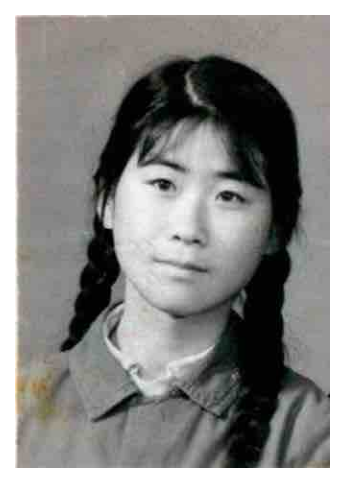

In [10]:
test_img = cv2.imread('./images/4.jpg')
test_img_cvt = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(test_img_cvt)

deoldify 转换成功


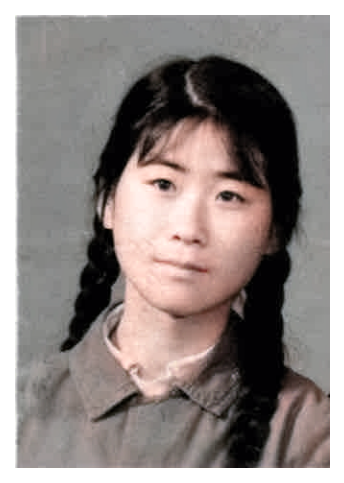

In [11]:
deold_img = gan.deoldify(test_img)   
deold_img_cvt = cv2.cvtColor(deold_img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(deold_img_cvt)

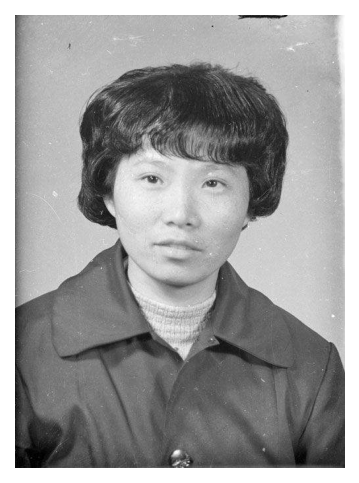

In [12]:
test_img = cv2.imread('./images/2.png')
test_img_cvt = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(test_img_cvt)

deoldify 转换成功


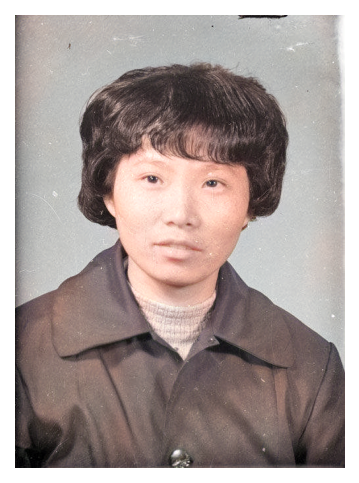

In [13]:
deold_img = gan.deoldify(test_img)   
deold_img_cvt = cv2.cvtColor(deold_img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(deold_img_cvt)

In [14]:
# 保存一张图

In [15]:
cv2.imwrite('./images/color_out.jpg',deold_img)

True

## 超分

In [16]:
sr_img = gan.realSR(deold_img)       

realSR 转换成功


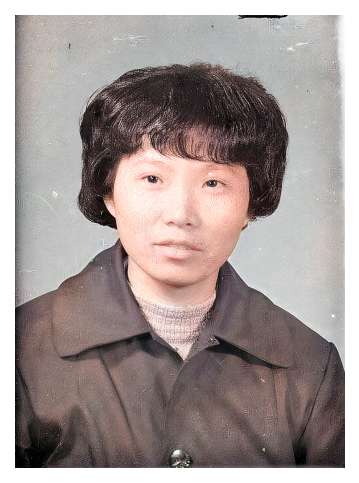

In [17]:
sr_img_cvt = cv2.cvtColor(sr_img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(sr_img_cvt)

### 保存，建议去文件夹查看

In [18]:
cv2.imwrite('./images/sr_out.jpg',sr_img)

True

## 人物动起来

In [19]:
from IPython.display import Video

In [20]:
# 查看驱动视频，驱动视频最好裁剪为480 x 640 大小的视频
driving_video = './images/enpei_sister.mp4'
# 显示视频
Video(driving_video)

In [21]:
# 被驱动的画面
source_image = './images/color_out.jpg'
# 输出视频
result_video = './images/fom_out.mp4'
# 驱动画面
gan.FOM_video(driving_video, source_image,result_video)

C:\conda\envs\project_gan\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\conda\envs\project_gan\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
  0%|                                                                                          | 0/252 [00:00<?, ?it/s]C:\conda\envs\project_gan\lib\site-packages\torch\nn\functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
C:\conda\envs\

In [22]:
# 显示处理后的视频

In [23]:
Video(result_video)

In [24]:
result_video

'./images/fom_out.mp4'

In [25]:
# 视频处理处理回原来的长度和宽度，并且再次超分
cap = cv2.VideoCapture(result_video)
fps = int(cap.get(cv2.CAP_PROP_FPS))
# 获取原始图片的长度和宽度
ori_h,ori_w = deold_img.shape[:2]
print(ori_h,ori_w)

resize_video = './images/fom_out_resize.mp4'

video_writer  = cv2.VideoWriter(resize_video, cv2.VideoWriter_fourcc(*'H264'), fps, (ori_w,ori_h))
frame_index = 1

while True:
    ret,frame = cap.read()
    if frame is None:
        break
    # 缩放原图应有长度和宽度
    frame = cv2.resize(frame,(ori_w,ori_h))
    # 写入
    video_writer.write(frame)
    
    frame_index+=1
    
cap.release()
video_writer.release()
    

687 500


In [26]:
Video(resize_video)